In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pickle


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
column_labels = ["Node Index", "Type", "X Coordinate", "Y Coordinate", "Z Coordinate", "Radius", "Parent Node Index"]
PREPROCESS = True

In [4]:
# Definisci il percorso ai tuoi file SWC
data_path = '/content/drive/MyDrive/Progetto DSN/Data/'

In [5]:
def load_swc_files(path):
    swc_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.swc')]
    neurons = []
    for file in swc_files:
        try:
            n = np.loadtxt(file)
            neurons.append(pd.DataFrame(n, columns=column_labels))
        except Exception as e:
            print(f"Failed to load {file}: {e}")
    return neurons

In [6]:
VISp = load_swc_files(data_path + "Primary Visual Area/")
VISal = load_swc_files(data_path + "Anterolateral Visual Area/")
SSp_bfd = load_swc_files(data_path + "Primary Somatosensory Area Barrel Field/")

In [ ]:
len(VISp[43])

60425

In [ ]:
with open('area_data.pkl', 'wb') as file:
    pickle.dump({
        'VISp': VISp,
        'VISal': VISal,
        'SSp_bfd': SSp_bfd
    }, file)

In [ ]:
print(f"Loaded {len(VISp)} neurons from Primary Visual Area")
print(f"Loaded {len(VISal)} neurons from Anterolateral Visual Area")
print(f"Loaded {len(SSp_bfd)} neurons from Primary Somatosensory Area Barrel Field")

VISp[0].head()

Loaded 88 neurons from Primary Visual Area
Loaded 32 neurons from Anterolateral Visual Area
Loaded 110 neurons from Primary Somatosensory Area Barrel Field


,Node Index,Type,X Coordinate,Y Coordinate,Z Coordinate,Radius,Parent Node Index
0,1.0,1.0,6295.872858,1523.237085,3821.164694,1.0,-1.0
1,2.0,2.0,6297.136427,1524.995086,3821.164694,1.0,1.0
2,3.0,2.0,6308.952877,1533.820274,3824.748243,1.0,2.0
3,4.0,2.0,6313.712335,1542.797449,3824.316603,1.0,3.0
4,5.0,2.0,6331.448196,1567.639898,3836.197020,1.0,4.0


In [ ]:
def plot_swc(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, node in data.iterrows():
        x, y, z = node["X Coordinate"], node["Y Coordinate"], node["Z Coordinate"]
        ax.scatter(x, y, z, s=node["Radius"]*10, alpha=0.6)  # scale radius for better visibility

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

#plot_swc(VISp[0])

**I DATI SONO IN LISTE DI DATAFRAMES**

In [ ]:
#CALCOLO IL NUMERO DI FOGLIE PER CIASCUN NEURONE
#UNA FOGLIA HA UN ID CHE NON COMPARE MAI NELLA CASELLA PADRE

#Calcoliamo il numero di foglie per ciascun neurone

# Trova gli indici dei nodi che non compaiono nella colonna "Parent Node Index"
def count_leaves(neuron_df):
    leaf_indices = set(neuron_df['Node Index']) - set(neuron_df['Parent Node Index'])
    return len(leaf_indices)


num_leaves_VISp = [count_leaves(df) for df in VISp]
num_leaves_VISal = [count_leaves(df) for df in VISal]
num_leaves_SSp_bfd = [count_leaves(df) for df in SSp_bfd]

In [ ]:
with open('num_leaves.pkl', 'wb') as file:
    pickle.dump({
        'VISp': num_leaves_VISp,
        'VISal': num_leaves_VISal,
        'SSp_bfd': num_leaves_SSp_bfd
    }, file)

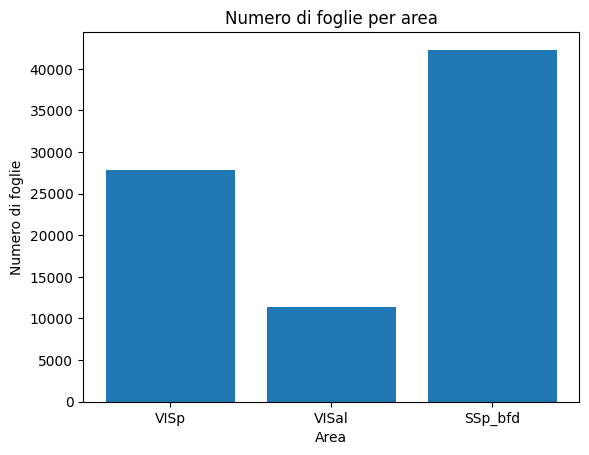

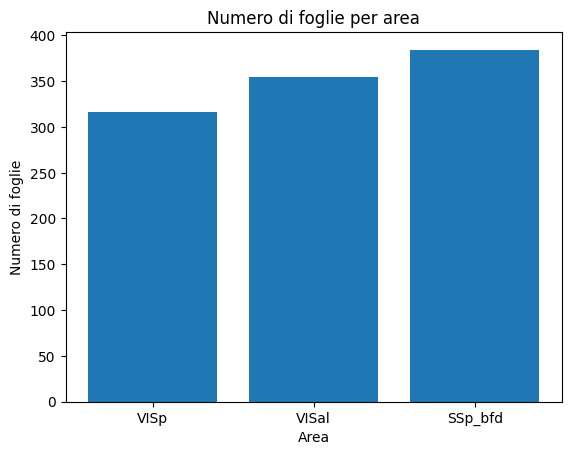

In [ ]:
areas = ['VISp', 'VISal', 'SSp_bfd']
num_leaves = [num_leaves_VISp, num_leaves_VISal, num_leaves_SSp_bfd]

plt.bar(areas, [sum(leaves) for leaves in num_leaves])
plt.xlabel('Area')
plt.ylabel('Numero di foglie')
plt.title('Numero di foglie per area')
plt.show()

plt.bar(areas, [sum(leaves)/len(leaves) for leaves in num_leaves])
plt.xlabel('Area')
plt.ylabel('Numero di foglie')
plt.title('Numero di foglie per area')
plt.show()

In [ ]:
#CONTO IL NUMERO DI BIFORCAZIONI


def count_branch_points(neuron_df):
    # Conta quante volte ogni nodo viene utilizzato come genitore
    parent_counts = neuron_df['Parent Node Index'].value_counts()
    # Seleziona i nodi genitore con più di un figlio
    num_branches = (parent_counts > 1).sum()
    return num_branches


num_branches_VISp = [count_branch_points(df) for df in VISp]
num_branches_VISal = [count_branch_points(df) for df in VISal]
num_branches_SSp_bfd = [count_branch_points(df) for df in SSp_bfd]

In [ ]:
with open('num_branches.pkl', 'wb') as file:
    pickle.dump({
        'VISp': num_branches_VISp,
        'VISal': num_branches_VISal,
        'SSp_bfd': num_branches_SSp_bfd
    }, file)

In [ ]:
count_branch_points(VISp[0])

491

In [ ]:
count_branch_points(VISp[2])

817

In [ ]:
# Funzione per calcolare le statistiche
def calculate_statistics(values):
    return {
        'mean': np.mean(values),
        'median': np.median(values),
        'std': np.std(values),
        'min': np.min(values),
        'max': np.max(values)
    }

# Funzione per visualizzare le statistiche
def display_statistics(stats, area_name):
    print(f"Statistiche per {area_name}:")
    print(f"Media: {stats['mean']}")
    print(f"Mediana: {stats['median']}")
    print(f"Deviazione Standard: {stats['std']}")
    print(f"Minimo: {stats['min']}")
    print(f"Massimo: {stats['max']}")
    print()

# Calcolo delle statistiche per ciascuna area
stats_VISp = calculate_statistics(num_branches_VISp)
stats_VISal = calculate_statistics(num_branches_VISal)
stats_SSp_bfd = calculate_statistics(num_branches_SSp_bfd)

# Visualizzazione delle statistiche
display_statistics(stats_VISp, 'VISp')
display_statistics(stats_VISal, 'VISal')
display_statistics(stats_SSp_bfd, 'SSp_bfd')

Statistiche per VISp:
Media: 308.57954545454544
Mediana: 198.0
Deviazione Standard: 309.4580204160063
Minimo: 53
Massimo: 2217

Statistiche per VISal:
Media: 346.5625
Mediana: 264.5
Deviazione Standard: 221.46372974767223
Minimo: 74
Massimo: 916

Statistiche per SSp_bfd:
Media: 375.8818181818182
Mediana: 311.0
Deviazione Standard: 288.86743520855197
Minimo: 74
Massimo: 2006



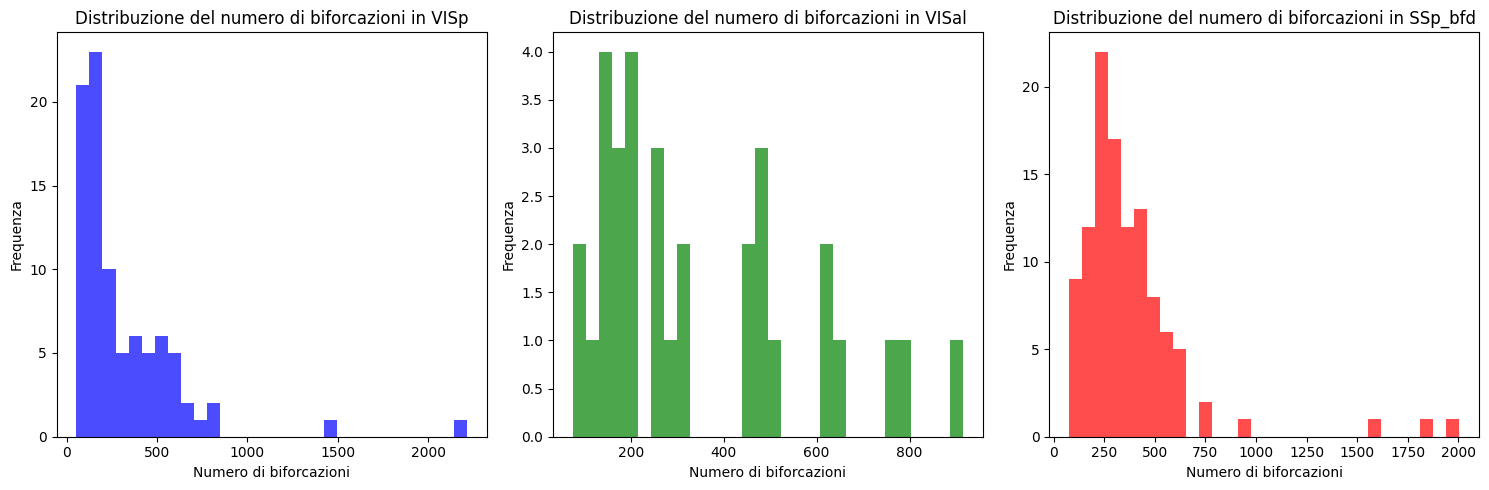

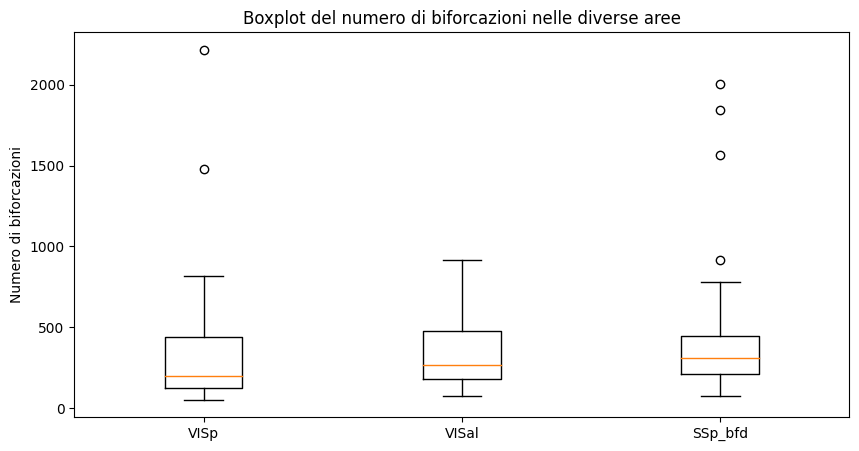

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(num_branches_VISp, bins=30, alpha=0.7, color='blue')
plt.title('Distribuzione del numero di biforcazioni in VISp')
plt.xlabel('Numero di biforcazioni')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 2)
plt.hist(num_branches_VISal, bins=30, alpha=0.7, color='green')
plt.title('Distribuzione del numero di biforcazioni in VISal')
plt.xlabel('Numero di biforcazioni')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 3)
plt.hist(num_branches_SSp_bfd, bins=30, alpha=0.7, color='red')
plt.title('Distribuzione del numero di biforcazioni in SSp_bfd')
plt.xlabel('Numero di biforcazioni')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))

data = [num_branches_VISp, num_branches_VISal, num_branches_SSp_bfd]
plt.boxplot(data, labels=['VISp', 'VISal', 'SSp_bfd'])

plt.title('Boxplot del numero di biforcazioni nelle diverse aree')
plt.ylabel('Numero di biforcazioni')
plt.show()

In [ ]:
def calculate_angle(v1, v2):
    # Calcola il prodotto scalare e le norme dei vettori
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    # Calcola il coseno dell'angolo
    if norm_v1 == 0 or norm_v2 == 0:
        return None  # Ignora questo caso

    cos_angle = dot_product / (norm_v1 * norm_v2)

    # Calcola l'angolo in radianti e poi convertilo in gradi
    angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    return angle_deg

def find_branch_angles(neuron_df):
    # Trova i punti di biforcazione
    parent_counts = neuron_df['Parent Node Index'].value_counts()
    branch_points = parent_counts[parent_counts > 1].index # Lista degli indici dei nodi padre

    angles = []

    for parent in branch_points:
        # Trova i figli del nodo di biforcazione
        children = neuron_df[neuron_df['Parent Node Index'] == parent]

        # Calcola i vettori per ciascun ramo
        vectors = []
        parent_coords = neuron_df[neuron_df['Node Index'] == parent][['X Coordinate', 'Y Coordinate', 'Z Coordinate']].values[0]

        for _, child in children.iterrows():
            child_coords = child[['X Coordinate', 'Y Coordinate', 'Z Coordinate']].values
            vector = child_coords - parent_coords
            vectors.append(vector)

            # Controlla se il vettore è nullo
            if np.linalg.norm(vector) == 0:
                print(f"Errore: nodo genitore e nodo figlio hanno le stesse coordinate.")
                print(f"Nodo genitore (index {parent}): {parent_coords}")
                print(f"Nodo figlio (index {child['Node Index']}): {child_coords}")


        # Calcola gli angoli tra i vettori
        for i in range(len(vectors)):
            for j in range(i + 1, len(vectors)):
                angle = calculate_angle(vectors[i], vectors[j])
                if angle is not None:
                    angles.append(angle)

    return angles

# Supponendo che la tua lista di DataFrame sia chiamata "neuron_dfs"
branch_angles_list_VISp = [find_branch_angles(df) for df in VISp]
branch_angles_list_VISal = [find_branch_angles(df) for df in VISal]
branch_angles_list_SSp_bfd = [find_branch_angles(df) for df in SSp_bfd]

Streaming output truncated to the last 5000 lines.
Nodo genitore (index 23576.0): [3617.18277  2265.555547 2868.540524]
Nodo figlio (index 23577.0): [3617.18277  2265.555547 2868.540524]
Errore: nodo genitore e nodo figlio hanno le stesse coordinate.
Nodo genitore (index 23576.0): [3617.18277  2265.555547 2868.540524]
Nodo figlio (index 23585.0): [3617.18277  2265.555547 2868.540524]
Errore: nodo genitore e nodo figlio hanno le stesse coordinate.
Nodo genitore (index 1374.0): [6986.175258 2611.57919  2018.809318]
Nodo figlio (index 1375.0): [6986.175258 2611.57919  2018.809318]
Errore: nodo genitore e nodo figlio hanno le stesse coordinate.
Nodo genitore (index 1374.0): [6986.175258 2611.57919  2018.809318]
Nodo figlio (index 1494.0): [6986.175258 2611.57919  2018.809318]
Errore: nodo genitore e nodo figlio hanno le stesse coordinate.
Nodo genitore (index 8327.0): [8040.440841 4664.0285   4376.31501 ]
Nodo figlio (index 8328.0): [8040.440841 4664.0285   4376.31501 ]
Errore: nodo genito

In [ ]:
with open('branch_angles.pkl', 'wb') as file:
    pickle.dump({
        'VISp': branch_angles_list_VISp,
        'VISal': branch_angles_list_VISal,
        'SSp_bfd': branch_angles_list_SSp_bfd
    }, file)

In [ ]:
len(branch_angles_list_VISp)

88

In [ ]:
len(find_branch_angles(VISp[0])) #518 = 491+27, 27 è il numero di angoli che calcola per il primo nodo che ha 8 figli, tutti gli altri sono biforcazioni binarie

518

In [ ]:
VISp[2].loc[VISp[2]['Node Index'] == 5500]

,Node Index,Type,X Coordinate,Y Coordinate,Z Coordinate,Radius,Parent Node Index
5499,5500.0,2.0,2753.14587,1441.525084,9681.356209,1.0,5499.0


In [ ]:
VISp[2].loc[VISp[2]['Node Index'] == 5501]

,Node Index,Type,X Coordinate,Y Coordinate,Z Coordinate,Radius,Parent Node Index
5500,5501.0,2.0,2753.14587,1441.525084,9681.356209,1.0,5500.0


In [ ]:
find_branch_angles(VISp[2])

Errore: nodo genitore e nodo figlio hanno le stesse coordinate.
Nodo genitore (index 5500.0): [2753.14587  1441.525084 9681.356209]
Nodo figlio (index 5501.0): [2753.14587  1441.525084 9681.356209]


841

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_statistics(angles):
    return {
        'mean': np.mean(angles),
        'median': np.median(angles),
        'std': np.std(angles),
        'min': np.min(angles),
        'max': np.max(angles)
    }

def display_statistics(stats, area_name):
    print(f"Statistiche per {area_name}:")
    print(f"Media: {stats['mean']}")
    print(f"Mediana: {stats['median']}")
    print(f"Deviazione Standard: {stats['std']}")
    print(f"Minimo: {stats['min']}")
    print(f"Massimo: {stats['max']}")
    print()

# Supponendo che branch_angles_list_VISp, branch_angles_list_VISal e branch_angles_list_SSp_bfd
# contengano gli angoli delle biforcazioni per ciascun neurone nelle rispettive aree
angles_VISp = [angle for sublist in branch_angles_list_VISp for angle in sublist]
angles_VISal = [angle for sublist in branch_angles_list_VISal for angle in sublist]
angles_SSp_bfd = [angle for sublist in branch_angles_list_SSp_bfd for angle in sublist]

# Calcolo delle statistiche
stats_VISp = calculate_statistics(angles_VISp)
stats_VISal = calculate_statistics(angles_VISal)
stats_SSp_bfd = calculate_statistics(angles_SSp_bfd)

# Visualizzazione delle statistiche
display_statistics(stats_VISp, 'VISp')
display_statistics(stats_VISal, 'VISal')
display_statistics(stats_SSp_bfd, 'SSp_bfd')


Statistiche per VISp:
Media: 75.94230877624133
Mediana: 72.89940795768553
Deviazione Standard: 34.01009479198792
Minimo: 1.9437273670637654
Massimo: 178.30415994054712

Statistiche per VISal:
Media: 72.84060090110597
Mediana: 69.59950076029318
Deviazione Standard: 33.7296069456892
Minimo: 1.8303008209405849
Massimo: 177.52532499309606

Statistiche per SSp_bfd:
Media: 73.62596119236076
Mediana: 70.25620625250602
Deviazione Standard: 33.478594280411784
Minimo: 0.0
Massimo: 180.0



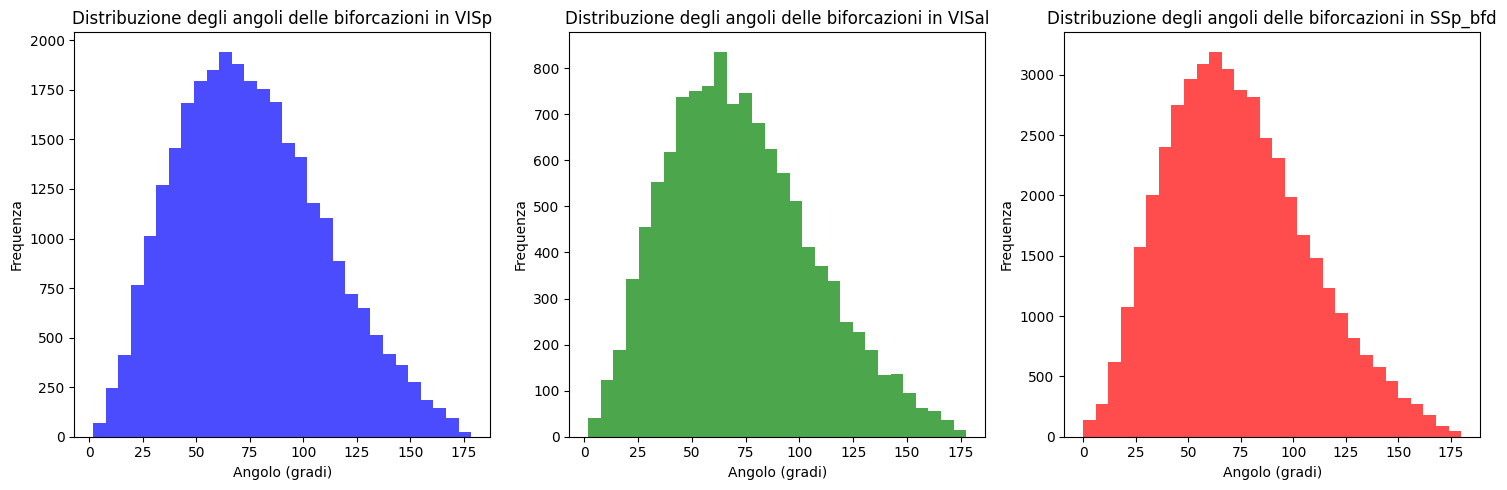

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(angles_VISp, bins=30, alpha=0.7, color='blue')
plt.title('Distribuzione degli angoli delle biforcazioni in VISp')
plt.xlabel('Angolo (gradi)')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 2)
plt.hist(angles_VISal, bins=30, alpha=0.7, color='green')
plt.title('Distribuzione degli angoli delle biforcazioni in VISal')
plt.xlabel('Angolo (gradi)')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 3)
plt.hist(angles_SSp_bfd, bins=30, alpha=0.7, color='red')
plt.title('Distribuzione degli angoli delle biforcazioni in SSp_bfd')
plt.xlabel('Angolo (gradi)')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()


**LUNGHEZZA MEDIA DEI SEGMENTI
**

In [ ]:
def segment_length(node1, node2):
    return np.linalg.norm(node1 - node2)

def calculate_segment_length(neuron_df):
    total_length = 0
    segment_count = 0

    for _, row in neuron_df.iterrows():
        parent_index = row['Parent Node Index']
        if parent_index != -1:  # Se il nodo ha un genitore
            parent_coords = neuron_df[neuron_df['Node Index'] == parent_index][['X Coordinate', 'Y Coordinate', 'Z Coordinate']].values
            if len(parent_coords) > 0:  # Verifica se il genitore esiste
                node_coords = row[['X Coordinate', 'Y Coordinate', 'Z Coordinate']].values
                total_length += segment_length(node_coords, parent_coords[0])
                segment_count += 1

    if segment_count == 0:
        return (0, 0)  # Evita la divisione per zero
    return (total_length, segment_count)

In [ ]:
segment_length_VISp = [calculate_segment_length(df) for df in VISp]
segment_length_VISal = [calculate_segment_length(df) for df in VISal]
segment_length_SSp_bfd = [calculate_segment_length(df) for df in SSp_bfd]

In [ ]:
with open('segment_length.pkl', 'wb') as file:
    pickle.dump({
        'VISp': segment_length_VISp,
        'VISal': segment_length_VISal,
        'SSp_bfd': segment_length_SSp_bfd
    }, file)

Statistiche per VISp:
Media: 21.737615051698466
Mediana: 21.209031093695828
Deviazione Standard: 12.829031628430133
Minimo: 5.65619618849239
Massimo: 56.94672313534734

Statistiche per VISal:
Media: 22.17806593720088
Mediana: 21.60941062825477
Deviazione Standard: 11.72199529154106
Minimo: 6.181819083460106
Massimo: 56.94672313534734

Statistiche per SSp_bfd:
Media: 22.724478630664212
Mediana: 22.00481759768125
Deviazione Standard: 11.905426118915353
Minimo: 5.0945413297634445
Massimo: 61.56170287070845



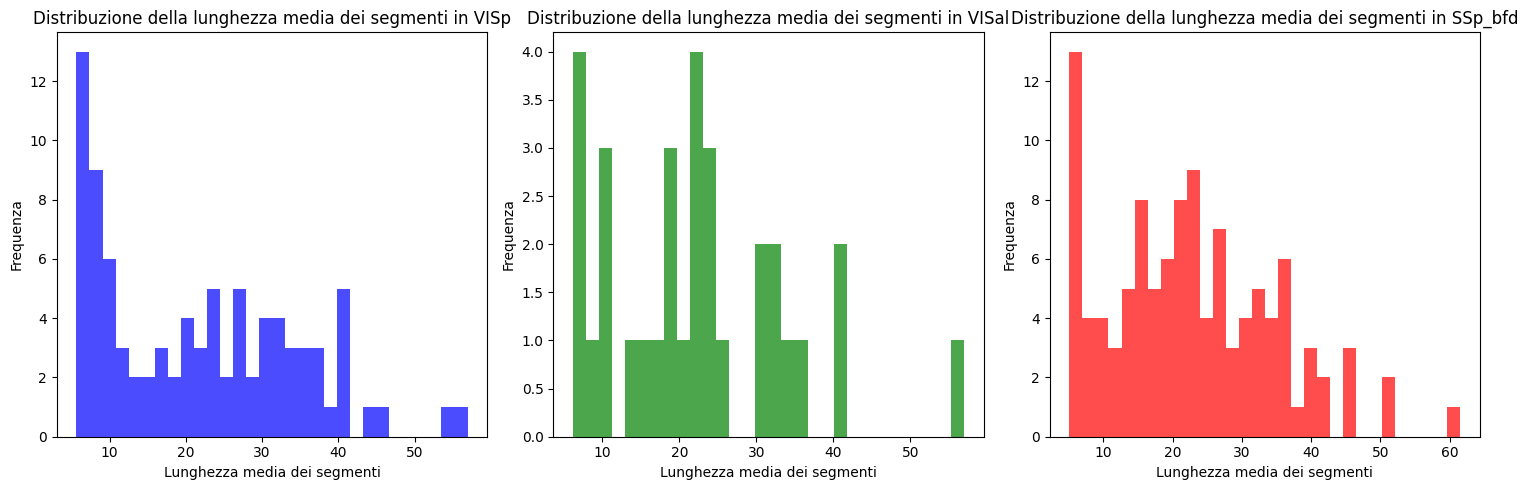

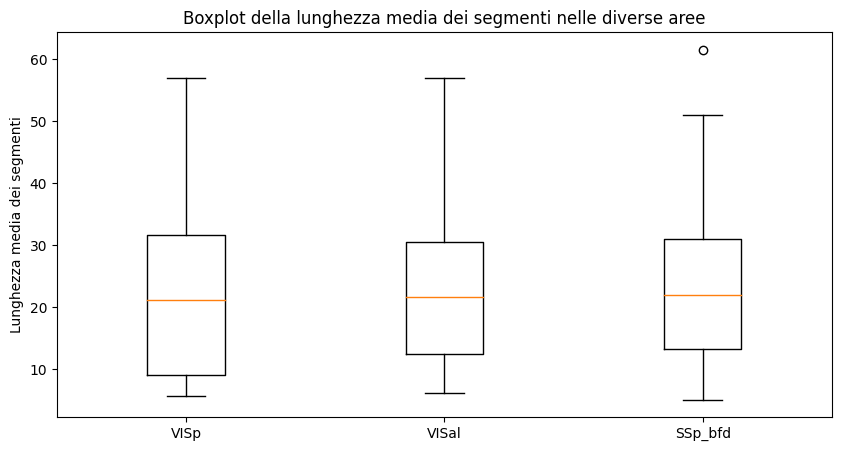

In [ ]:
# Funzione per visualizzare le statistiche
def display_statistics(average_lengths, area_name):
    print(f"Statistiche per {area_name}:")
    print(f"Media: {np.mean(average_lengths)}")
    print(f"Mediana: {np.median(average_lengths)}")
    print(f"Deviazione Standard: {np.std(average_lengths)}")
    print(f"Minimo: {np.min(average_lengths)}")
    print(f"Massimo: {np.max(average_lengths)}")
    print()

# Visualizzazione delle statistiche
display_statistics(average_segment_length_VISp, 'VISp')
display_statistics(average_segment_length_VISal, 'VISal')
display_statistics(average_segment_length_SSp_bfd, 'SSp_bfd')

# Istogrammi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(average_segment_length_VISp, bins=30, alpha=0.7, color='blue')
plt.title('Distribuzione della lunghezza media dei segmenti in VISp')
plt.xlabel('Lunghezza media dei segmenti')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 2)
plt.hist(average_segment_length_VISal, bins=30, alpha=0.7, color='green')
plt.title('Distribuzione della lunghezza media dei segmenti in VISal')
plt.xlabel('Lunghezza media dei segmenti')
plt.ylabel('Frequenza')

plt.subplot(1, 3, 3)
plt.hist(average_segment_length_SSp_bfd, bins=30, alpha=0.7, color='red')
plt.title('Distribuzione della lunghezza media dei segmenti in SSp_bfd')
plt.xlabel('Lunghezza media dei segmenti')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))

data = [average_segment_length_VISp, average_segment_length_VISal, average_segment_length_SSp_bfd]
plt.boxplot(data, labels=['VISp', 'VISal', 'SSp_bfd'])

plt.title('Boxplot della lunghezza media dei segmenti nelle diverse aree')
plt.ylabel('Lunghezza media dei segmenti')
plt.show()


**DIMENSIONE FRATTALE**

In [7]:
#Metto il neurone in un parallelepipedo e lo divido in tanti altri parallelepipedi con le stesse dimensioni. Conto quanti di questi mini
#parallelepipedi contengono almeno un nodo del neurone che stiamo analizzando
def box_counting(neuron_df, box_size):
    x_min, x_max = neuron_df['X Coordinate'].min(), neuron_df['X Coordinate'].max()
    y_min, y_max = neuron_df['Y Coordinate'].min(), neuron_df['Y Coordinate'].max()
    z_min, z_max = neuron_df['Z Coordinate'].min(), neuron_df['Z Coordinate'].max()

    x_range = np.arange(x_min, x_max, box_size)
    y_range = np.arange(y_min, y_max, box_size)
    z_range = np.arange(z_min, z_max, box_size)

    box_count = 0

    for x in x_range:
        for y in y_range:
            for z in z_range:
                # Verifica se la scatola contiene almeno un nodo
                in_box = neuron_df[
                    (neuron_df['X Coordinate'] >= x) & (neuron_df['X Coordinate'] < x + box_size) &
                    (neuron_df['Y Coordinate'] >= y) & (neuron_df['Y Coordinate'] < y + box_size) &
                    (neuron_df['Z Coordinate'] >= z) & (neuron_df['Z Coordinate'] < z + box_size)
                ]
                if not in_box.empty:
                    box_count += 1

    return box_count

In [8]:
#Per ogni dimensione delle scatole, vado a contare quante di queste contengono almento un nodo con la funzione box_counting
#Calcolo il logaritmo del numero di scatole e la porzione di queste che contiene almeno un nodo
#Calcolo la pendenza della retta
#La dimensione frattale è data dall'opposto della pendenza della retta
#Praticamente vado a vedere come al variare delle dimensioni delle scatole, va a variare il numero di scatole necessarie per coprire il neurone
def fractal_dimension(neuron_df, box_sizes):
    counts = []
    for box_size in box_sizes:

        counts.append(box_counting(neuron_df, box_size))

    log_box_sizes = np.log(box_sizes)
    log_counts = np.log(counts)

    # Utilizziamo una regressione lineare per trovare la pendenza della retta
    coeffs = np.polyfit(log_box_sizes, log_counts, 1)
    return -coeffs[0], log_box_sizes, log_counts

In [9]:
from tqdm import tqdm

# Definisci le dimensioni delle scatole
#box_sizes = np.logspace(2, 3, num=10)  # Ad esempio, 10 dimensioni di scatole tra 10^2 e 10^3
box_sizes = [250, 500, 750, 1000]

# Calcola le dimensioni frattali per ciascuna area
fractal_dimensions_VISp = []
fractal_dimensions_VISal = []
fractal_dimensions_SSp_bfd = []

# Calcola le dimensioni frattali per l'area VISp
print("Calcolo della dimensione frattale per l'area VISp:")
for df in tqdm(VISp, desc="Neuroni VISp"):
    fractal_dimensions_VISp.append(fractal_dimension(df, box_sizes)[0])

# Calcola le dimensioni frattali per l'area VISal
print("Calcolo della dimensione frattale per l'area VISal:")
for df in tqdm(VISal, desc="Neuroni VISal"):
    fractal_dimensions_VISal.append(fractal_dimension(df, box_sizes)[0])

# Calcola le dimensioni frattali per l'area SSp_bfd
print("Calcolo della dimensione frattale per l'area SSp_bfd:")
for df in tqdm(SSp_bfd, desc="Neuroni SSp_bfd"):
    fractal_dimensions_SSp_bfd.append(fractal_dimension(df, box_sizes)[0])


Calcolo della dimensione frattale per l'area VISp:


Neuroni VISp: 100%|██████████| 88/88 [25:17<00:00, 17.24s/it]


Calcolo della dimensione frattale per l'area VISal:


Neuroni VISal: 100%|██████████| 32/32 [13:27<00:00, 25.22s/it]


Calcolo della dimensione frattale per l'area SSp_bfd:


Neuroni SSp_bfd: 100%|██████████| 110/110 [38:35<00:00, 21.05s/it]


In [16]:
with open('fractal_dimensions.pkl', 'wb') as file:
    pickle.dump({
        'VISp': fractal_dimensions_VISp,
        'VISal': fractal_dimensions_VISal,
        'SSp_bfd': fractal_dimensions_SSp_bfd
    }, file)

Statistiche descrittive per VISp: {'mean': 1.5297329371420287, 'std': 0.24705318269679755, 'min': 1.0577386087099696, 'max': 2.3219280948873653, 'median': 1.5203440977170142}
Statistiche descrittive per VISal: {'mean': 1.5215044430697393, 'std': 0.1334065813594462, 'min': 1.2390236484023234, 'max': 1.8629125182805049, 'median': 1.5196959865628825}
Statistiche descrittive per SSp_bfd: {'mean': 1.5647662587851157, 'std': 0.15049854874417135, 'min': 1.1609640474436838, 'max': 1.9866165452186106, 'median': 1.56715002776671}
T-test VISp vs VISal: t-statistic = 0.17765246646944544 , p-value = 0.8593005213250421
T-test VISp vs SSp_bfd: t-statistic = -1.2230150348039783 , p-value = 0.222792476896003
T-test VISal vs SSp_bfd: t-statistic = -1.4566818615462678 , p-value = 0.14744337353227574


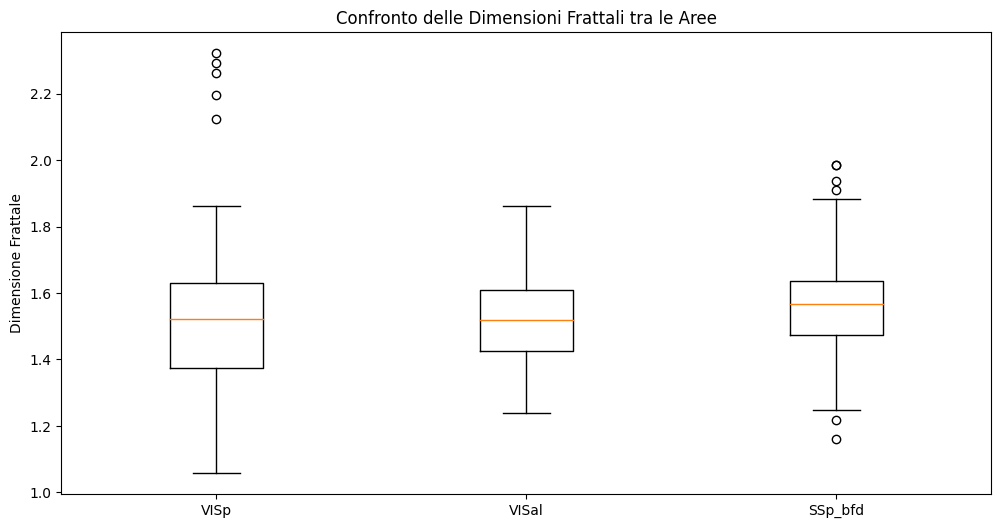

In [ ]:
# Analisi statistica
def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'min': np.min(data),
        'max': np.max(data),
        'median': np.median(data)
    }

stats_VISp = descriptive_stats(fractal_dimensions_VISp)
stats_VISal = descriptive_stats(fractal_dimensions_VISal)
stats_SSp_bfd = descriptive_stats(fractal_dimensions_SSp_bfd)

print("Statistiche descrittive per VISp:", stats_VISp)
print("Statistiche descrittive per VISal:", stats_VISal)
print("Statistiche descrittive per SSp_bfd:", stats_SSp_bfd)

# Confronto delle dimensioni frattali tra le aree
t_stat_VISp_VISal, p_value_VISp_VISal = ttest_ind(fractal_dimensions_VISp, fractal_dimensions_VISal)
t_stat_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(fractal_dimensions_VISp, fractal_dimensions_SSp_bfd)
t_stat_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(fractal_dimensions_VISal, fractal_dimensions_SSp_bfd)

print("T-test VISp vs VISal: t-statistic =", t_stat_VISp_VISal, ", p-value =", p_value_VISp_VISal)
print("T-test VISp vs SSp_bfd: t-statistic =", t_stat_VISp_SSp_bfd, ", p-value =", p_value_VISp_SSp_bfd)
print("T-test VISal vs SSp_bfd: t-statistic =", t_stat_VISal_SSp_bfd, ", p-value =", p_value_VISal_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([fractal_dimensions_VISp, fractal_dimensions_VISal, fractal_dimensions_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Dimensione Frattale')
plt.title('Confronto delle Dimensioni Frattali tra le Aree')
plt.show()

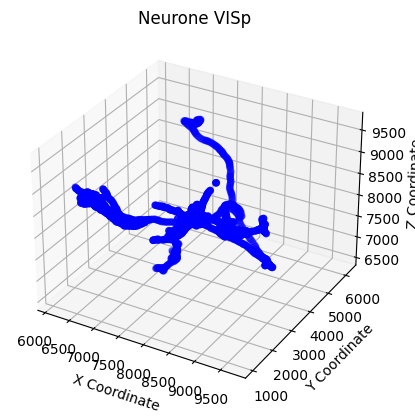

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che VISp sia una lista di DataFrame contenente i dati dei neuroni
# Selezioniamo il primo neurone
neuron_df = VISp[3]

# Plot del neurone in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neuron_df['X Coordinate'], neuron_df['Y Coordinate'], neuron_df['Z Coordinate'], c='b', marker='o')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Neurone VISp')

plt.show()

In [13]:
neuron_df = VISp[3]

In [14]:
# Eseguiamo il calcolo della dimensione frattale
box_sizes = np.logspace(2, 3, num=10)
dimension, log_box_sizes, log_counts = fractal_dimension(neuron_df, box_sizes)

print(f"Dimensione frattale: {dimension}")

Dimensione frattale: 1.2165742456575745


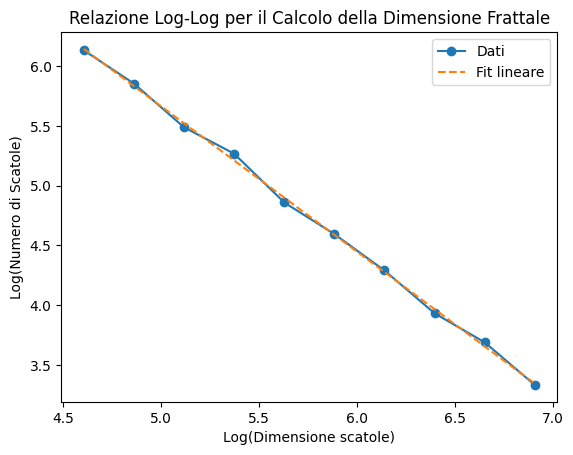

In [15]:
plt.figure()
plt.plot(log_box_sizes, log_counts, 'o-', label='Dati')
plt.plot(log_box_sizes, np.poly1d(np.polyfit(log_box_sizes, log_counts, 1))(log_box_sizes), '--', label='Fit lineare')

plt.xlabel('Log(Dimensione scatole)')
plt.ylabel('Log(Numero di Scatole)')
plt.title('Relazione Log-Log per il Calcolo della Dimensione Frattale')
plt.legend()
plt.show()